In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataset import Dataset, Batch

from field_index import FieldIndex

In [2]:
dfr = pd.read_csv('/home/egor/Desktop/2D_Valyton/sps/ALL_VALUNT0910_R_utm.txt', sep='\s+', header=None)
dfr.columns = ['rline', 'rid', 'x', 'y', 'z']

dfs = pd.read_csv('/home/egor/Desktop/2D_Valyton/sps/ALL_VALUNT0910_S_utm.txt', sep='\s+', header=None)
dfs.columns = ['sline', 'sid', 'point_index', 'sht_depth', 'uphole', 'x', 'y', 'z']
dfs = dfs.dropna(axis=0)

dfx = pd.read_csv('/home/egor/Desktop/2D_Valyton/sps/ALL_VALUNT0910_X.sps',
                  sep='\s+', header=None, skiprows=49)
dfx.columns = ['tape', 'xid', 'sline', 'sid', 'from_channel', 'to_channel', 'rline',
               'from_receiver', 'to_receiver']
dfx['sline'] = dfx['sline'].apply(lambda x: "S" + str(x))
dfx['rline'] = dfx['rline'].apply(lambda x: "R" + str(x))

In [3]:
index = FieldIndex(dfr=dfr, dfs=dfs, dfx=dfx)

In [4]:
fset = Dataset(index, Batch)

In [14]:
batch = fset.next_batch(300)

In [6]:
batch.indices[:3]

Index(['S1/1011', 'S1/1031', 'S1/1051'], dtype='object')

<IPython.core.display.Javascript object>


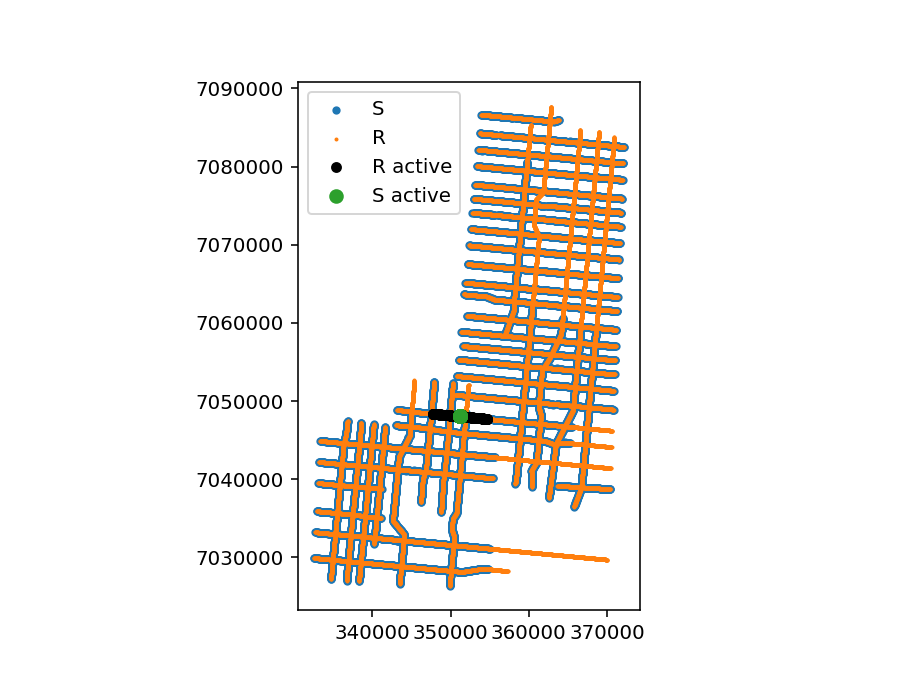

In [18]:
%matplotlib notebook

plt.scatter(dfs['x'], dfs['y'], s=10, label="S")
plt.scatter(dfr['x'], dfr['y'], s=1, label="R")

view = batch.index._idf.loc[batch.indices[125]]
plt.scatter(view['x_r'], view['y_r'], s=20, c='black', label="R active")
plt.scatter(view['x_s'], view['y_s'], s=40, label="S active")

plt.legend()
plt.axes().set_aspect('equal')
plt.show()

In [19]:
origin = np.array([ 332509.32, 7015372.82])
phi = 20
bin_size = 10000

index = FieldIndex(dfr=dfr, dfs=dfs, dfx=dfx, origin=origin, phi=phi, bin_size=bin_size)

In [20]:
fset = Dataset(index, Batch)

In [21]:
batch = fset.next_batch(10)

In [22]:
batch.indices[:3]

Index(['1/1', '1/2', '1/3'], dtype='object')

<IPython.core.display.Javascript object>


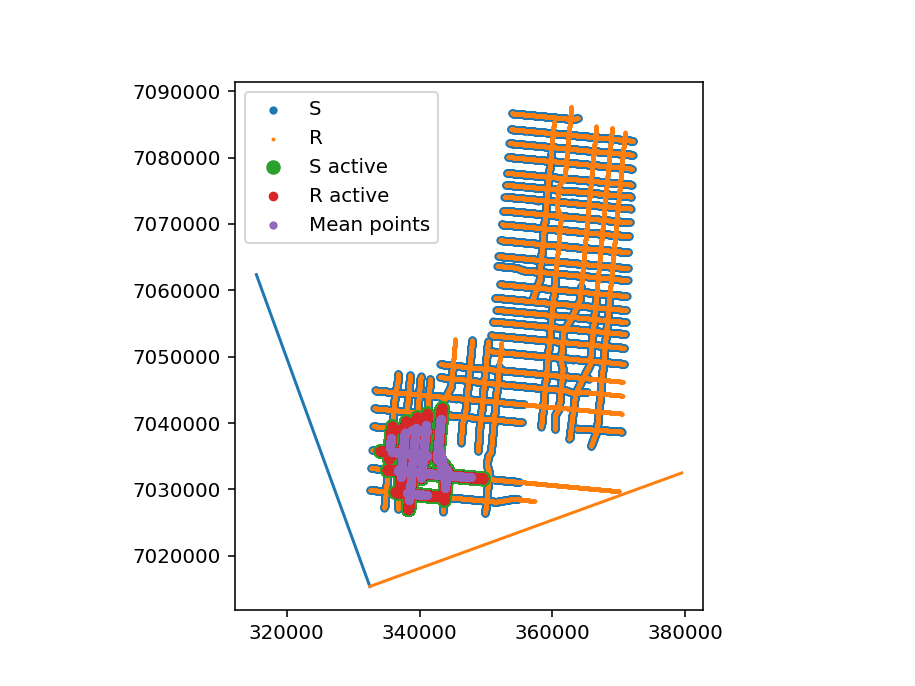

In [23]:
%matplotlib notebook

plt.scatter(dfs['x'], dfs['y'], s=10, label="S")
plt.scatter(dfr['x'], dfr['y'], s=1, label="R")

view = batch.index._idf.loc[batch.indices[4]]
plt.scatter(view['x_s'], view['y_s'], s=40, label="S active")
plt.scatter(view['x_r'], view['y_r'], s=15, label="R active")
plt.scatter(view['x_m'], view['y_m'], s=10, label="Mean points")

l = 50000
vecs = np.array([[0, l], [l, 0]])
rphi = phi * np.pi / 180
rotm = np.array([[np.cos(rphi), -np.sin(rphi)], [np.sin(rphi), np.cos(rphi)]])
vecs = origin + np.dot(rotm, vecs.T).T

plt.plot([origin[0], vecs[0, 0]], [origin[1], vecs[0, 1]])
plt.plot([origin[0], vecs[1, 0]], [origin[1], vecs[1, 1]])

plt.legend()
plt.axes().set_aspect('equal')
plt.show()